<a href="https://colab.research.google.com/github/utkarshkumarawasthi98/Machine-learning/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Dataset Evaluation:


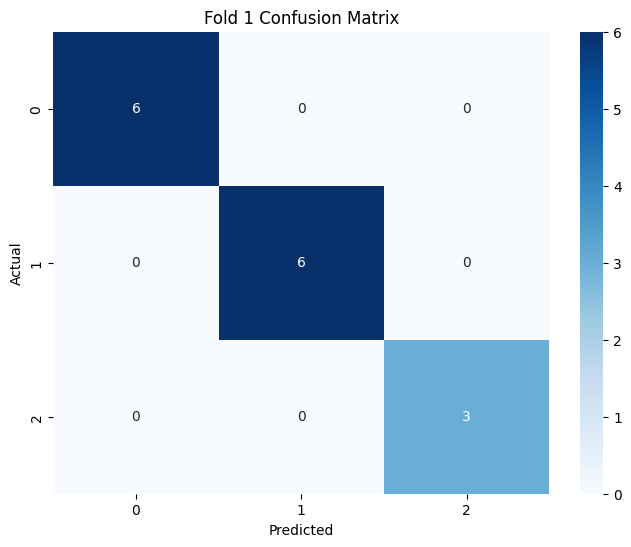

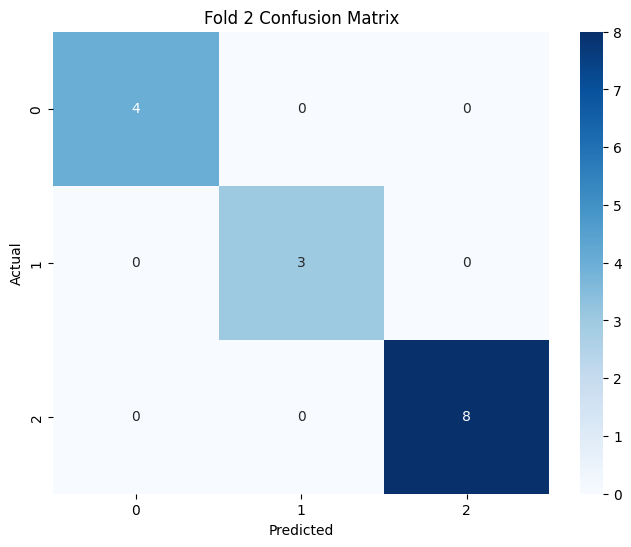

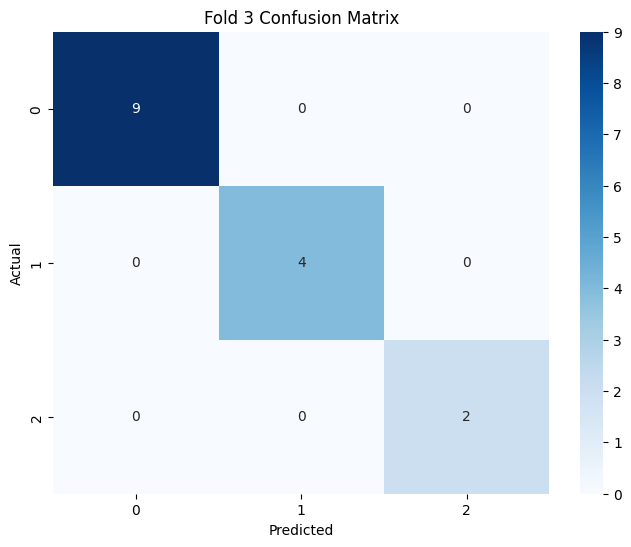

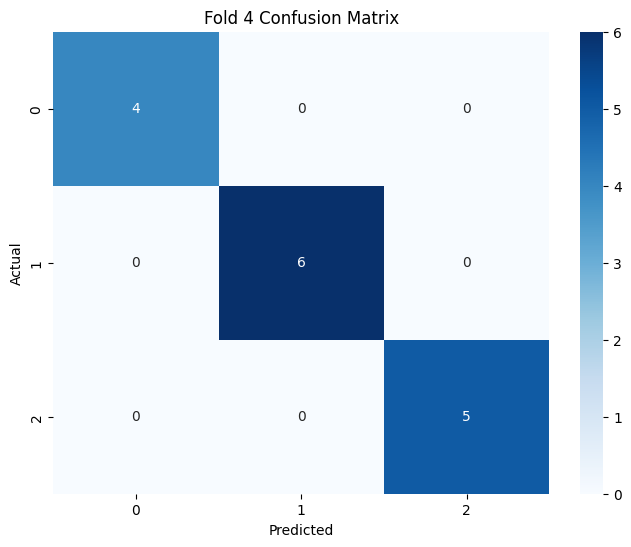

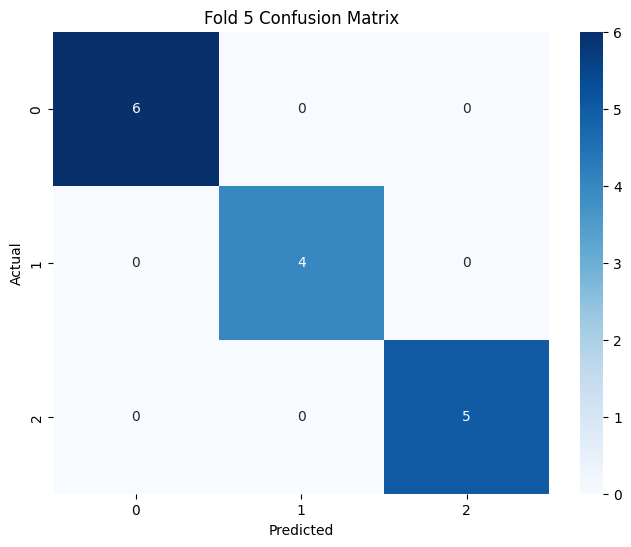

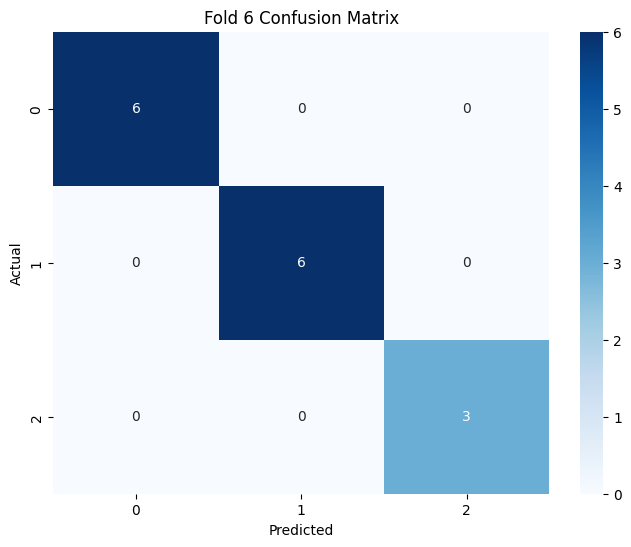

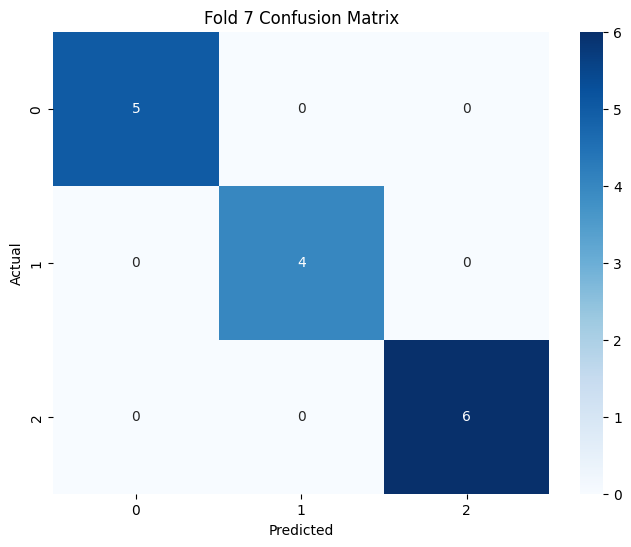

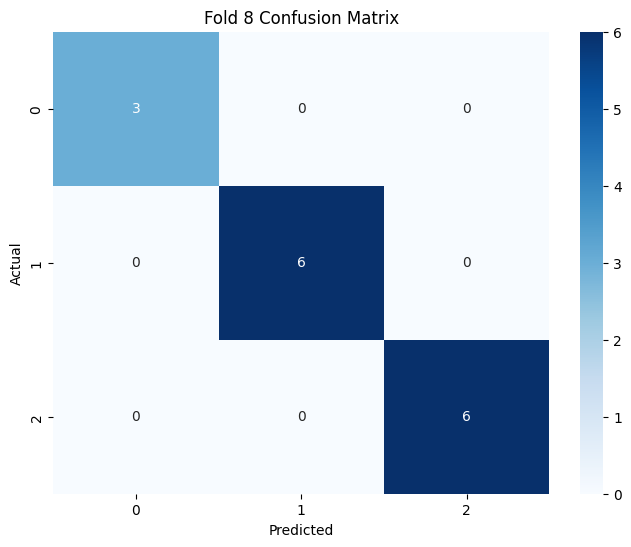

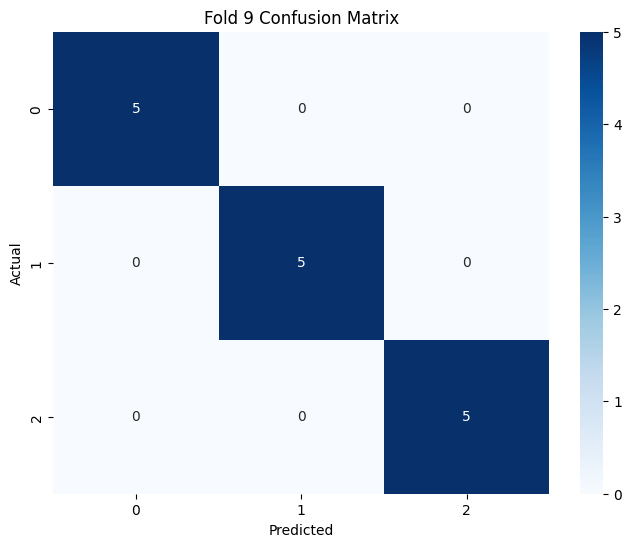

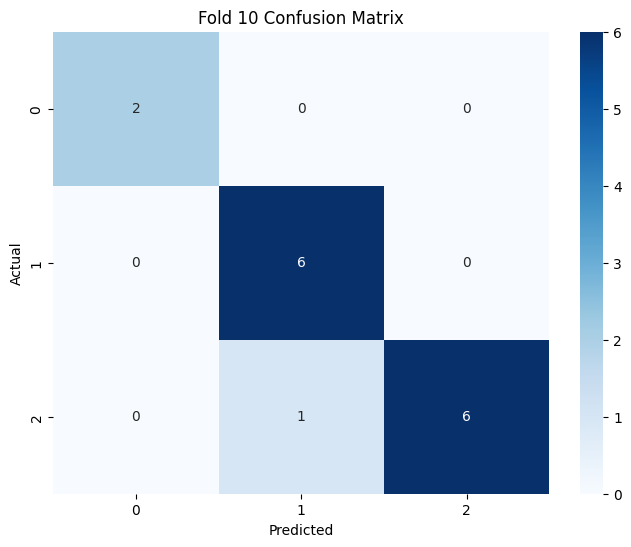


Fold 1 Metrics:
Accuracy: 1.00
RMSE: 0.00
RAA: 0.00
TPR: [1. 1. 1.]
FPR: [0. 0. 0.]
Kappa: 1.00

Fold 2 Metrics:
Accuracy: 1.00
RMSE: 0.00
RAA: 0.00
TPR: [1. 1. 1.]
FPR: [0. 0. 0.]
Kappa: 1.00

Fold 3 Metrics:
Accuracy: 1.00
RMSE: 0.00
RAA: 0.00
TPR: [1. 1. 1.]
FPR: [0. 0. 0.]
Kappa: 1.00

Fold 4 Metrics:
Accuracy: 1.00
RMSE: 0.00
RAA: 0.00
TPR: [1. 1. 1.]
FPR: [0. 0. 0.]
Kappa: 1.00

Fold 5 Metrics:
Accuracy: 1.00
RMSE: 0.00
RAA: 0.00
TPR: [1. 1. 1.]
FPR: [0. 0. 0.]
Kappa: 1.00

Fold 6 Metrics:
Accuracy: 1.00
RMSE: 0.00
RAA: 0.00
TPR: [1. 1. 1.]
FPR: [0. 0. 0.]
Kappa: 1.00

Fold 7 Metrics:
Accuracy: 1.00
RMSE: 0.00
RAA: 0.00
TPR: [1. 1. 1.]
FPR: [0. 0. 0.]
Kappa: 1.00

Fold 8 Metrics:
Accuracy: 1.00
RMSE: 0.00
RAA: 0.00
TPR: [1. 1. 1.]
FPR: [0. 0. 0.]
Kappa: 1.00

Fold 9 Metrics:
Accuracy: 1.00
RMSE: 0.00
RAA: 0.00
TPR: [1. 1. 1.]
FPR: [0. 0. 0.]
Kappa: 1.00

Fold 10 Metrics:
Accuracy: 0.93
RMSE: 0.26
RAA: 0.11
TPR: [1.         1.         0.85714286]
FPR: [0.         0.11111111 0.   

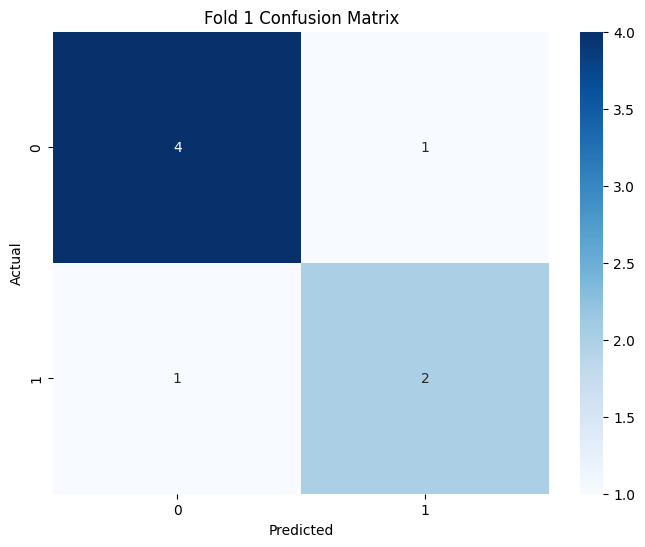

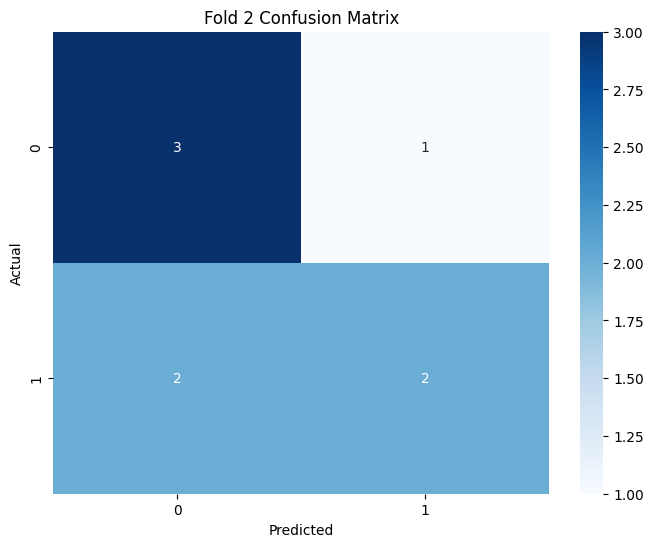

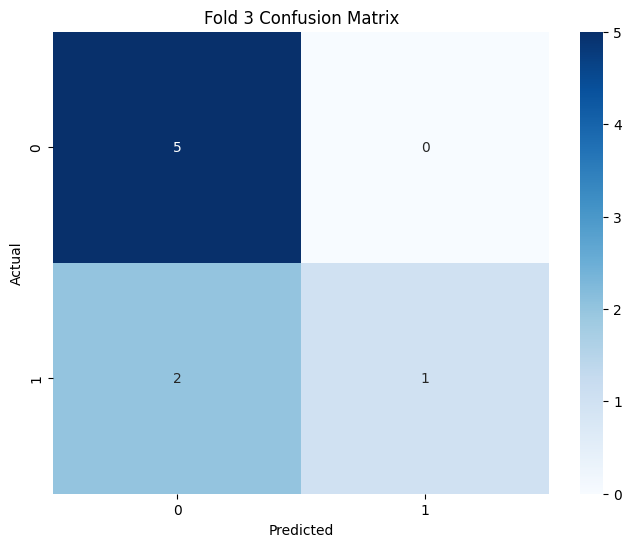

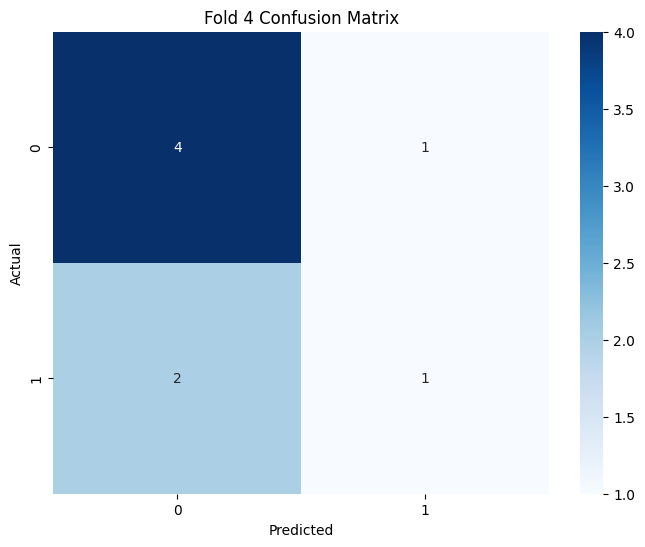

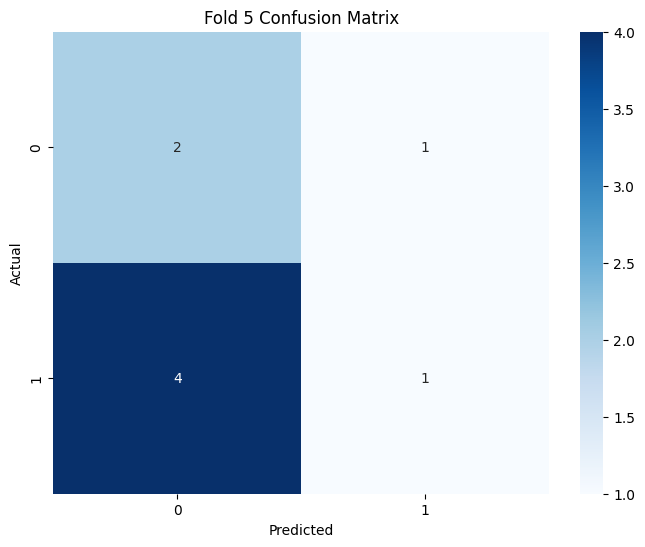

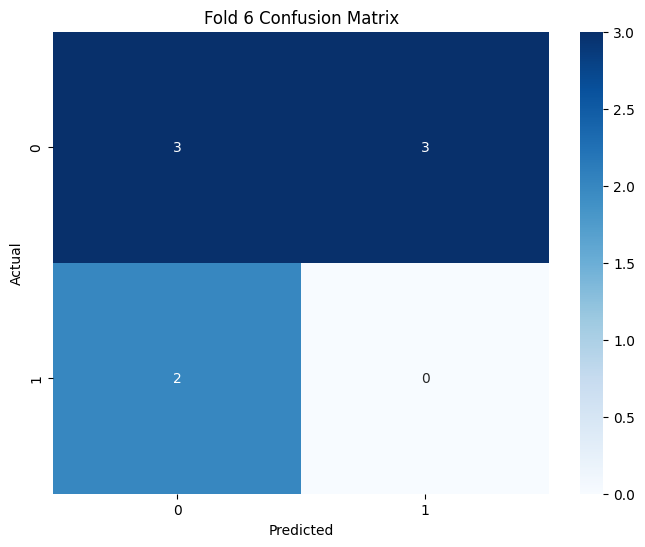

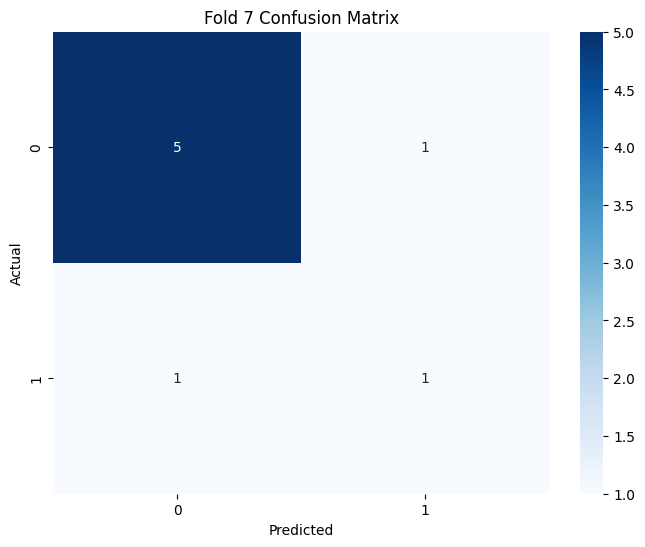

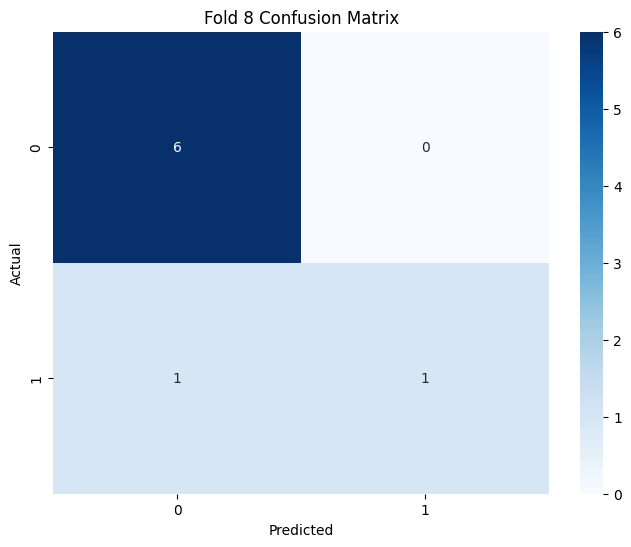

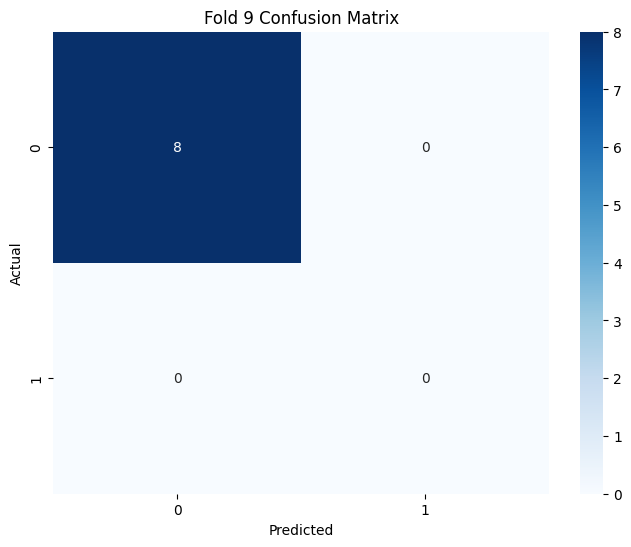

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:697: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


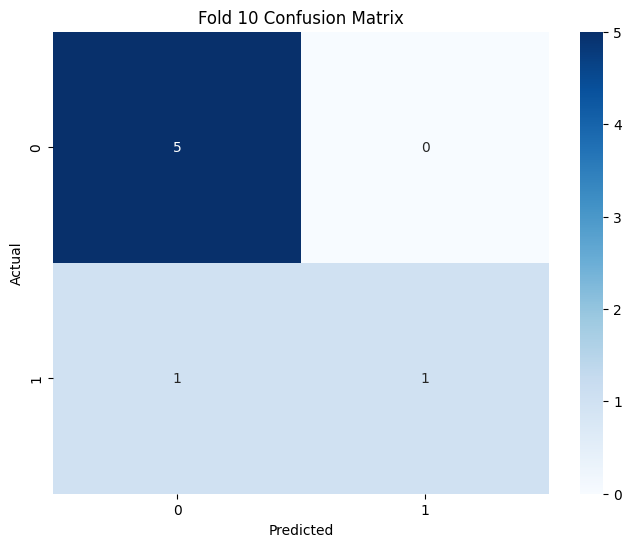


Fold 1 Metrics:
Accuracy: 0.75
RMSE: 0.50
RAA: 0.53
TPR: [0.8        0.66666667]
FPR: [0.33333333 0.2       ]
Kappa: 0.47

Fold 2 Metrics:
Accuracy: 0.62
RMSE: 0.61
RAA: 0.75
TPR: [0.75 0.5 ]
FPR: [0.5  0.25]
Kappa: 0.25

Fold 3 Metrics:
Accuracy: 0.75
RMSE: 0.50
RAA: 0.53
TPR: [1.         0.33333333]
FPR: [0.66666667 0.        ]
Kappa: 0.38

Fold 4 Metrics:
Accuracy: 0.62
RMSE: 0.61
RAA: 0.80
TPR: [0.8        0.33333333]
FPR: [0.66666667 0.2       ]
Kappa: 0.14

Fold 5 Metrics:
Accuracy: 0.38
RMSE: 0.79
RAA: 1.33
TPR: [0.66666667 0.2       ]
FPR: [0.8        0.33333333]
Kappa: -0.11

Fold 6 Metrics:
Accuracy: 0.38
RMSE: 0.79
RAA: 1.67
TPR: [0.5 0. ]
FPR: [1.  0.5]
Kappa: -0.43

Fold 7 Metrics:
Accuracy: 0.75
RMSE: 0.50
RAA: 0.67
TPR: [0.83333333 0.5       ]
FPR: [0.5        0.16666667]
Kappa: 0.33

Fold 8 Metrics:
Accuracy: 0.88
RMSE: 0.35
RAA: 0.33
TPR: [1.  0.5]
FPR: [0.5 0. ]
Kappa: 0.60

Fold 9 Metrics:
Accuracy: 1.00
RMSE: 0.00
RAA: nan
TPR: [1. 0.]
FPR: [0. 0.]
Kappa: nan

Fold

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the IRIS dataset
def load_iris_data():
    file_path = '/content/Iris.csv'  # Update this path
    iris_df = pd.read_csv(file_path)
    return iris_df

def preprocess_iris_data(df):
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    return X, y

# Load and preprocess the HEART(SPECT) dataset
def load_heart_data():
    file_path = '/content/SPECT.train.csv'  # Update this path
    heart_df = pd.read_csv(file_path, delimiter=',')
    return heart_df

def preprocess_heart_data(df):
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    return X, y

# Naive Bayes Classifier Implementation
class NaiveBayesClassifier:
    def __init__(self, epsilon=1e-6):
        self.epsilon = epsilon

    def fit(self, X, y):
        self.classes, counts = np.unique(y, return_counts=True)
        self.class_priors = counts / len(y)
        self.class_means = np.array([X[y == c].mean(axis=0) for c in self.classes])
        self.class_vars = np.array([X[y == c].var(axis=0) + self.epsilon for c in self.classes])

    def predict(self, X):
        predictions = []
        for x in X:
            log_probs = []
            for i, c in enumerate(self.classes):
                log_prob = np.log(self.class_priors[i])
                log_prob += -0.5 * np.sum(np.log(2 * np.pi * self.class_vars[i]))
                log_prob += -0.5 * np.sum(((x - self.class_means[i]) ** 2) / self.class_vars[i])
                log_probs.append(log_prob)
            predictions.append(self.classes[np.argmax(log_probs)])
        return np.array(predictions)

# Helper functions for evaluation
def calculate_tpr_fpr(cm):
    num_classes = cm.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)

    for i in range(num_classes):
        tp = cm[i, i]
        fn = np.sum(cm[i, :]) - tp
        fp = np.sum(cm[:, i]) - tp
        tn = np.sum(cm) - (tp + fn + fp)

        tpr[i] = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr[i] = fp / (fp + tn) if (fp + tn) > 0 else 0

    return tpr, fpr

def plot_confusion_matrix(cm, class_names, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Evaluation function for k-Fold Cross-Validation
def evaluate_model(X, y, k=10):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    class_labels = np.unique(y)

    fold_metrics = []
    all_metrics = {
        'accuracies': [],
        'rmses': [],
        'raas': [],
        'tprs': [],
        'fprs': [],
        'kappas': []
    }

    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = NaiveBayesClassifier()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred, labels=class_labels)
        plot_confusion_matrix(cm, class_labels, title=f'Fold {fold + 1} Confusion Matrix')

        # Metrics Calculation
        accuracy = accuracy_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        total_abs_error = np.sum(np.abs(y_test - y_pred))
        total_abs_deviation = np.sum(np.abs(y_test - np.mean(y_test)))
        raa = total_abs_error / total_abs_deviation if total_abs_deviation != 0 else np.nan
        tpr, fpr = calculate_tpr_fpr(cm)
        kappa = cohen_kappa_score(y_test, y_pred)

        # Store metrics for this fold
        fold_metrics.append({
            'accuracy': accuracy,
            'rmse': rmse,
            'raa': raa,
            'tpr': tpr,
            'fpr': fpr,
            'kappa': kappa
        })

        # Store metrics for averaging later
        all_metrics['accuracies'].append(accuracy)
        all_metrics['rmses'].append(rmse)
        all_metrics['raas'].append(raa)
        all_metrics['tprs'].append(tpr)
        all_metrics['fprs'].append(fpr)
        all_metrics['kappas'].append(kappa)

    # Average metrics across all folds
    avg_metrics = {metric: np.mean(values) for metric, values in all_metrics.items()}
    avg_metrics['tprs'] = np.mean(np.vstack(all_metrics['tprs']), axis=0)
    avg_metrics['fprs'] = np.mean(np.vstack(all_metrics['fprs']), axis=0)

    return fold_metrics, avg_metrics

# Load and preprocess datasets
iris_df = load_iris_data()
X_iris, y_iris = preprocess_iris_data(iris_df)

heart_df = load_heart_data()
X_heart, y_heart = preprocess_heart_data(heart_df)

# Evaluate IRIS dataset
print("Iris Dataset Evaluation:")
iris_fold_metrics, iris_avg_metrics = evaluate_model(X_iris, y_iris)

for fold, metrics in enumerate(iris_fold_metrics, start=1):
    print(f"\nFold {fold} Metrics:")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print(f"RMSE: {metrics['rmse']:.2f}")
    print(f"RAA: {metrics['raa']:.2f}")
    print(f"TPR: {metrics['tpr']}")
    print(f"FPR: {metrics['fpr']}")
    print(f"Kappa: {metrics['kappa']:.2f}")

print("\nAverage Metrics:")
print(f"Average Accuracy: {iris_avg_metrics['accuracies']:.2f}")
print(f"Average RMSE: {iris_avg_metrics['rmses']:.2f}")
print(f"Average RAA: {iris_avg_metrics['raas']:.2f}")
print(f"Average TPR: {iris_avg_metrics['tprs']}")
print(f"Average FPR: {iris_avg_metrics['fprs']}")
print(f"Average Kappa: {iris_avg_metrics['kappas']:.2f}")

# Evaluate HEART(SPECT) dataset
print("\nHEART(SPECT) Dataset Evaluation:")
heart_fold_metrics, heart_avg_metrics = evaluate_model(X_heart, y_heart)

for fold, metrics in enumerate(heart_fold_metrics, start=1):
    print(f"\nFold {fold} Metrics:")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print(f"RMSE: {metrics['rmse']:.2f}")
    print(f"RAA: {metrics['raa']:.2f}")
    print(f"TPR: {metrics['tpr']}")
    print(f"FPR: {metrics['fpr']}")
    print(f"Kappa: {metrics['kappa']:.2f}")

print("\nAverage Metrics:")
print(f"Average Accuracy: {heart_avg_metrics['accuracies']:.2f}")
print(f"Average RMSE: {heart_avg_metrics['rmses']:.2f}")
print(f"Average RAA: {heart_avg_metrics['raas']:.2f}")
print(f"Average TPR: {heart_avg_metrics['tprs']}")
print(f"Average FPR: {heart_avg_metrics['fprs']}")
print(f"Average Kappa: {heart_avg_metrics['kappas']:.2f}")
